- $\epsilon_\infty$: a constant

We can set the anisotropic and dispersive epsilon by using **`epsilon_diag`** in `mp.Medium`. 

- $\omega_n$: resonant frequency
- $\gamma_n$: damping rate
- $\sigma_n$: scale factor of the $n$ resonator

We can set the anisotropic and dispersive epsilon by using **`sigma_diag`** in `mp.LorentzianSusceptibility`. 

$$\epsilon = \epsilon_\infty + \sum_n \frac{\sigma_n f_n^2}{f_n^2 - f(f+i\gamma)}$$

Note:  there is no need to divide $\gamma$ by $2\pi$. The definition in the example of [Meep doc](https://meep.readthedocs.io/en/latest/Python_Tutorials/Material_Dispersion/) seems wrong.
 

hBN10
$$\epsilon_\infty = \begin{pmatrix} 5.1 & 0 & 0 \\ 0 & 5.1 & 0 \\ 0 & 0 & 2.5 \end{pmatrix}$$
The oscillator in the ordinary dirction
- $f_o = 1394.5$ cm$^{-1}$ = 0.13945  $\mu$m$^{-1}$
- $\gamma_o=$1.8  cm$^{-1}$ = 0.00018  $\mu$m$^{-1}$
- $\sigma_o = 2.04$

The oscillator in the extraordinary dirction
- $f_e = 785 $ cm$^{-1}$ = 0.0785  $\mu$m$^{-1}$
- $\gamma_e=$1 cm$^{-1}$ = 0.0001  $\mu$m$^{-1}$
- $\sigma_e = 0.3068$

In [109]:
import numpy as np
import meep as mp
from matplotlib import pyplot as plt
## import my colormap
import mycmapls as ms
mycmap = ms.mycmap
mycmap1 = ms.mycmap1
mycmap2 = ms.mycmap2
bicmap = ms.bicmap

### hBN10

hBN10_fo = 0.13945
hBN10_gammao = 0.00018
hBN10_sigo = 2.04

hBN10_susc_o = [
    mp.LorentzianSusceptibility(
        frequency=hBN10_fo,
        gamma=hBN10_gammao,
        sigma_diag=hBN10_sigo * mp.Vector3(1, 0, 1)
    )
]
   

hBN10_fe = 0.0785
hBN10_gammae =  0.0001
hBN10_sige = 0.3068

hBN10_susc_e = [
    mp.LorentzianSusceptibility(
        frequency=hBN10_fe,
        gamma=hBN10_gammae,
        sigma_diag=hBN10_sige * mp.Vector3(0, 1, 0)
    )
]
  

hBN10_2d = mp.Medium(
    epsilon_diag=mp.Vector3(5.1, 2.5, 5.1),
    E_susceptibilities= hBN10_susc_o + hBN10_susc_e,
    
)

### hBN11

hBN11_fo = 0.13598
hBN11_gammao = 0.00021
hBN11_sigo = 2.1258

hBN11_susc_o = [
    mp.LorentzianSusceptibility(
        frequency=hBN11_fo,
        gamma=hBN11_gammao,
        sigma_diag=hBN11_sigo * mp.Vector3(1, 0, 1)
    )
]
   

hBN11_fe = 0.0755
hBN11_gammae =  0.0001
hBN11_sige = 0.5116

hBN11_susc_e = [
    mp.LorentzianSusceptibility(
        frequency=hBN11_fe,
        gamma=hBN11_gammae,
        sigma_diag=hBN11_sige * mp.Vector3(0, 1, 0)
    )
]
  

hBN11_2d = mp.Medium(
    epsilon_diag=mp.Vector3(5.32, 3.15,5.32),
    E_susceptibilities= hBN11_susc_o + hBN11_susc_e,
    
)



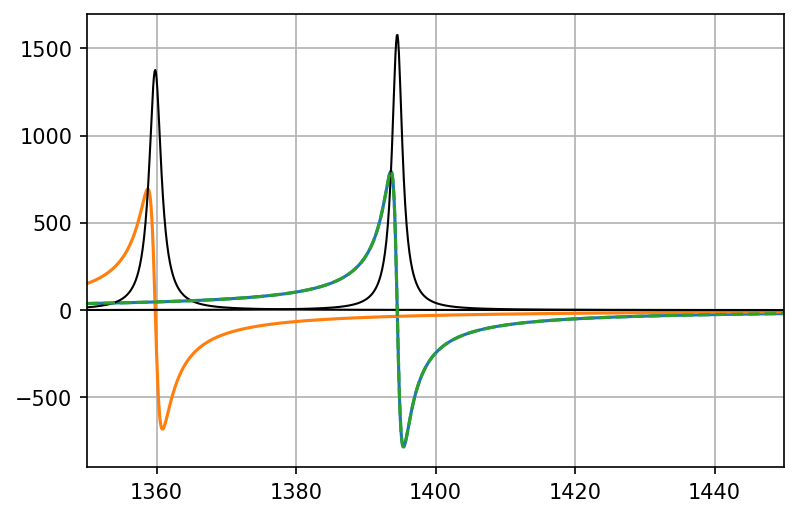

In [58]:
Nf = 1000
fv = np.linspace(0.1350,0.1450,Nf)
eo = np.empty(Nf,dtype=complex)
eo_ana = 5.1 + hBN10_sigo * hBN10_fo**2 /(hBN10_fo**2 - fv**2 - 1j * fv * 0.00018)
eo_11 = np.empty(Nf,dtype=complex)

for i in range(Nf):
    eo[i] = hBN10.epsilon(fv[i])[0,0]
    eo_11[i] = hBN11.epsilon(fv[i])[0,0]
##
plt.figure(dpi=150)
plt.plot(fv * 10000,np.real(eo))
plt.plot(fv * 10000,np.real(eo_11))
plt.plot(fv * 10000,np.imag(eo),linewidth = 1,color = 'k')
plt.plot(fv * 10000,np.imag(eo_11),linewidth = 1,color = 'k')

plt.plot(fv * 10000,np.real(eo_ana),'--')
plt.xlim(1350,1450)
plt.grid()
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.00108004 s
Working in 2D dimensions.
Computational cell is 0.5 x 0.25 x 0 with resolution 500
     block, center = (0,0,0)
          size (1e+20,0.045,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.32,3.15,5.32)
time for set_epsilon = 0.0601349 s
time for set_conductivity = 0.00238204 s
time for set_conductivity = 0.00184608 s
time for set_conductivity = 0.00288987 s
time for set_conductivity = 0.00252199 s
time for set_conductivity = 0.00349903 s
time for set_conductivity = 0.00535607 s
lorentzian susceptibility: frequency=0.0755, gamma=0.0001
lorentzian susceptibility: frequency=0.13598, gamma=0.00021
-----------


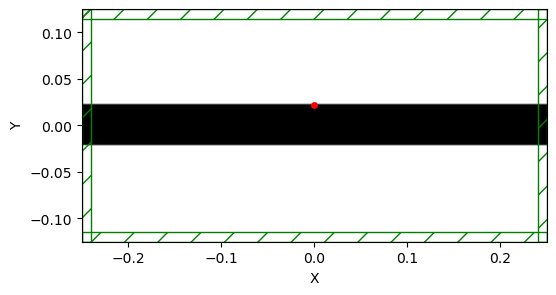

In [100]:
cell = mp.Vector3(0.5,0.25)
geometry = [ mp.Block(mp.Vector3(mp.inf,0.045,mp.inf),
                     center = mp.Vector3(),
                    material =  hBN11_2d
)
           ]

sources = [mp.Source(mp.ContinuousSource(frequency = 0.1430),
                     component=mp.Ey,
                    center=mp.Vector3(0,0.0225),
                    size=mp.Vector3(0,0))
          ]
boundary_layers=[mp.Absorber(thickness=0.01)]
resolution = 500
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()


In [108]:
sim.run(until= 150)

FloatProgress(value=300.0, description='0% done ', max=450.0, min=300.0)

on time step 300000 (time=300), 0.0735322 s/step
Meep progress: 13.227000000000032/450.0 = 2.9% done in 4.0s, 132.1s to go
on time step 313264 (time=313.264), 0.000301587 s/step
Meep progress: 27.52600000000001/450.0 = 6.1% done in 8.0s, 122.8s to go
on time step 327566 (time=327.566), 0.000279684 s/step
Meep progress: 41.35000000000002/450.0 = 9.2% done in 12.0s, 118.6s to go
on time step 341392 (time=341.392), 0.000289311 s/step
Meep progress: 55.10000000000002/450.0 = 12.2% done in 16.0s, 114.7s to go
on time step 355149 (time=355.149), 0.000290776 s/step
Meep progress: 69.053/450.0 = 15.3% done in 20.0s, 110.3s to go
on time step 369105 (time=369.105), 0.000286628 s/step
Meep progress: 82.916/450.0 = 18.4% done in 24.0s, 106.3s to go
on time step 382970 (time=382.97), 0.000288529 s/step
Meep progress: 96.54500000000002/450.0 = 21.5% done in 28.0s, 102.5s to go
on time step 396601 (time=396.601), 0.000293457 s/step
Meep progress: 109.19800000000004/450.0 = 24.3% done in 32.0s, 99.9s

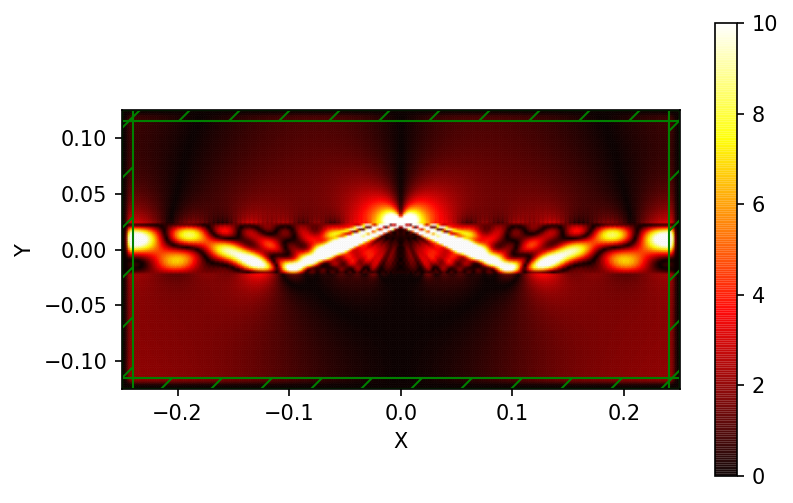

In [107]:
#
Hz = sim.get_array(component=mp.Hz, vol=mp.Volume(center=mp.Vector3(0,0), size=mp.Vector3(0.5,0.25)))
##
nx = Hz.shape[0]
ny = Hz.shape[1]
xv = np.linspace(-.25,.25,nx)
yv = np.linspace(-0.125,0.125,ny)
xx, yy = np.meshgrid(xv, yv)
plt.figure(dpi=150)
plt.pcolormesh(xx,yy,np.abs(np.transpose(Hz)), cmap= 'hot',alpha= 0.8,shading='gouraud')
plt.colorbar()
sim.plot2D(source_parameters={'alpha':0,'color':'white','linewidth':0.5})
plt.gca().set_aspect('equal', adjustable='box')
plt.clim(0,10)
plt.show()

In [175]:
def rp_11_10(q,f):
    k0 = 2 * np.pi * f
    eo10 = hBN10_2d.epsilon(f)[0,0]
    ee10 = hBN10_2d.epsilon(f)[1,1]
    eo11 = hBN11_2d.epsilon(f)[0,0]
    ee11 = hBN11_2d.epsilon(f)[1,1]
    kz10 = np.sqrt(eo10 * k0**2 - eo10 * q **2 / ee10)
    kz11 = np.sqrt(eo11 * k0**2 - eo11 * q **2 / ee11)
    rp   = (eo10 * kz11 - eo11 * kz10) / (eo10 * kz11 + eo11 * kz10)  

    return rp
def rp_11_air(q,f):
    k0 = 2 * np.pi * f
    eo = 1
    ee = 1
    eo11 = hBN11_2d.epsilon(f)[0,0]
    ee11 = hBN11_2d.epsilon(f)[1,1]
    kz = np.sqrt( (1+1e-10j)*k0**2 - q **2)
    kz11 = np.sqrt(eo11 * k0**2 - eo11 * q **2 / ee11)
    rp   = (eo * kz11 - eo11 * kz) / (eo * kz11 + eo11 * kz)  

    return rp

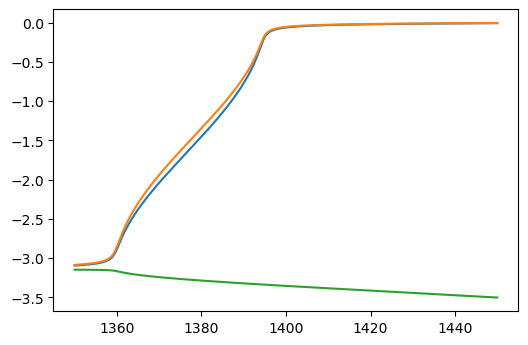

In [205]:
nf = 1000
fv = np.linspace(0.1350,0.1450,nf)
rpv = np.empty(nf,dtype=complex)
tmp = np.empty(nf,dtype=complex)
rpv_air = np.empty(nf,dtype=complex)
tmp_air = np.empty(nf,dtype=complex)

for i in range(nf):
    rpv[i] = rp_11_10(1000,fv[i])
    tmp[i] = rp_11_10(0,fv[i])
    rpv_air[i] = rp_11_air(1000,fv[i])
    tmp_air[i] = rp_11_air(0,fv[i])

phi_r = np.angle(rpv)
phi_tmp = np.angle(tmp)
phi_r_air = np.angle(rpv_air)
phi_tmp_air = np.angle(tmp_air)

plt.figure(dpi=100)
plt.plot(1e4*fv, phi_r)
plt.plot(1e4*fv, phi_tmp)
plt.plot(1e4*fv, phi_r_air-2*np.pi)
#plt.plot(1e4*fv, phi_tmp_air)
plt.show()

In [203]:
rp_11_air(2*np.pi*fv[i]*6,fv[i])

(-0.9388550373700932+0.35354648227380064j)